In [1]:
def get_class_name(class_id):
    
    import json
    annotation_file = './datasets/t1_train/t1_train_coco.json'
    with open(annotation_file, 'r') as file:
        _data = json.load(file)
        _classes = _data["categories"]

        for category in _classes:
            if(category["id"] == class_id):
                return category["name"]

In [2]:
from crop_features import crop_features

In [3]:
annotation_file = './datasets/t1_train/t1_train_coco.json'
image_dir = './data/coco/images'
objects_arr, class_arr, img_id_arr, bbox_arr = crop_features(annotation_file, image_dir)

Image set created with shape  torch.Size([100, 3, 384, 600])
Features created with shape torch.Size([100, 256, 96, 150])
Number of objects obtained :  665


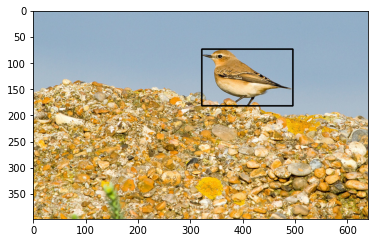

bird


In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
img = Image.open("data/coco/images/"+ "000000"+str(img_id_arr[0]) + ".jpg")
img = np.array(img)

start_pos = (int(bbox_arr[0][0]), int(bbox_arr[0][1]))
end_pos = (int(bbox_arr[0][0] + bbox_arr[0][2]) , int(bbox_arr[0][1] + bbox_arr[0][3]))
bbox = cv2.rectangle(img, start_pos, end_pos, thickness = 2, color = 0)
plt.imshow(img)
plt.imshow(bbox)
plt.show()

print(get_class_name(class_arr[0]))

In [5]:
data = np.array([x.numpy() for x in objects_arr], dtype=np.float32)
print(data.shape, data.dtype)

(665, 256) float32


In [6]:
from sklearn.decomposition import PCA
pca = PCA(2)

df = pca.fit_transform(data)
df.shape

(665, 2)

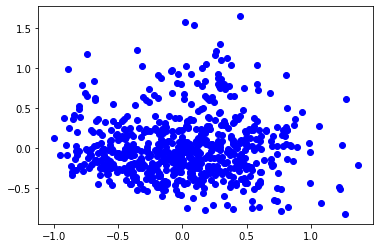

In [7]:
plt.scatter(df[:,0] , df[:,1] , color = 'blue')
plt.show()

In [8]:
classes = set(class_arr)
num_classes = len(list(classes))
print(num_classes)

45


In [9]:
known_classes_t1 = [
    "airplane","bicycle","bird","boat","bus","car",
    "cat","cow","dog","horse","motorcycle","sheep",
    "train","elephant","bear","zebra","giraffe","truck","person"
]

In [10]:
all_class_names = {}
unknwon_class_names = {}
knwon_class_names = {}

for i in list(classes):
    cls_name = get_class_name(i)
    all_class_names[i] = cls_name

    if(cls_name in known_classes_t1):
        knwon_class_names[i] = cls_name
    else:
        unknwon_class_names[i] = cls_name


In [11]:
print(all_class_names)
print("No of all classes : ", len(all_class_names.keys()))

{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 35: 'skis', 36: 'snowboard', 42: 'surfboard', 44: 'bottle', 47: 'cup', 50: 'spoon', 51: 'bowl', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 77: 'cell phone', 79: 'oven', 81: 'sink', 84: 'book', 85: 'clock'}
No of all classes :  45


In [12]:
print(knwon_class_names)
print("No of known classes : ", len(knwon_class_names.keys()))

{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 25: 'giraffe'}
No of known classes :  17


In [13]:
print(unknwon_class_names)
print("No of unknown classes : ", len(unknwon_class_names.keys()))

{10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 35: 'skis', 36: 'snowboard', 42: 'surfboard', 44: 'bottle', 47: 'cup', 50: 'spoon', 51: 'bowl', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 77: 'cell phone', 79: 'oven', 81: 'sink', 84: 'book', 85: 'clock'}
No of unknown classes :  28


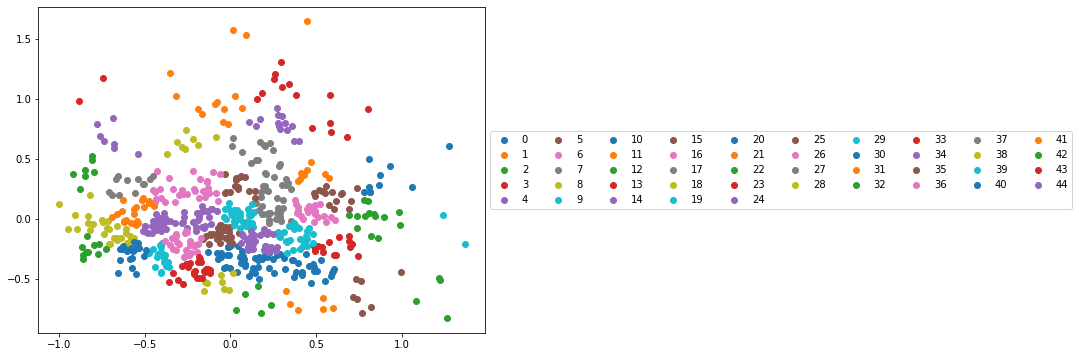

In [14]:
from sklearn.cluster import KMeans

k = 45
kmeans = KMeans(n_clusters= k)
label = kmeans.fit_predict(df)
u_labels = np.unique(label)

plt.figure(figsize=(8,6))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=10)
plt.show()

In [15]:
clusters = {}
for i in range(len(label)):
    cluster_id = label[i]
    cluster_name = all_class_names[class_arr[i]]
    
    if cluster_id not in clusters.keys():
        clusters[cluster_id] = []
        pass

    clusters[cluster_id].append(cluster_name)

In [16]:
for key in clusters.keys():
    print("cluster ", key, "-->", clusters[key])
    print()

cluster  9 --> ['bird', 'cow', 'dog', 'bird', 'dog', 'oven', 'sheep', 'cat', 'couch', 'boat', 'horse', 'bowl', 'book', 'book', 'book', 'book', 'car', 'car', 'cat', 'couch']

cluster  33 --> ['dog', 'person', 'person', 'car', 'umbrella', 'truck', 'car', 'car', 'sheep', 'sheep', 'bus', 'surfboard', 'train', 'bird', 'umbrella', 'book', 'book', 'truck', 'person', 'person', 'cow', 'potted plant', 'boat', 'boat', 'boat']

cluster  26 --> ['person', 'bench', 'person', 'motorcycle', 'motorcycle', 'person', 'bus', 'person', 'person', 'person', 'person', 'car', 'airplane', 'motorcycle', 'motorcycle', 'cat', 'chair', 'couch', 'giraffe', 'horse', 'bowl', 'bowl', 'book', 'chair', 'car', 'car', 'bus', 'motorcycle']

cluster  12 --> ['cow', 'cow', 'bird', 'person', 'person', 'car', 'car', 'snowboard', 'snowboard', 'bus', 'person', 'person', 'person', 'bench']

cluster  16 --> ['cow', 'cow', 'fire hydrant', 'fire hydrant', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person',

In [17]:
from statistics import mode


cluster_names = {}
for i in clusters.keys():
    cluster_names[i] = mode(clusters[i])

cluster_names

{9: 'book',
 33: 'person',
 26: 'person',
 12: 'person',
 16: 'person',
 19: 'person',
 39: 'car',
 7: 'person',
 4: 'person',
 15: 'person',
 32: 'cat',
 5: 'bird',
 29: 'bird',
 22: 'bird',
 30: 'car',
 13: 'person',
 31: 'boat',
 40: 'person',
 8: 'person',
 25: 'person',
 44: 'person',
 17: 'car',
 34: 'person',
 14: 'person',
 35: 'person',
 18: 'car',
 42: 'boat',
 36: 'person',
 43: 'traffic light',
 3: 'car',
 37: 'person',
 6: 'person',
 41: 'person',
 11: 'person',
 38: 'person',
 0: 'car',
 27: 'person',
 28: 'person',
 24: 'traffic light',
 10: 'car',
 2: 'bottle',
 1: 'person',
 21: 'traffic light',
 20: 'person',
 23: 'traffic light'}

In [18]:
import pandas as pd
pred_clusters = {'true_cls_id' : [], 'true_cls_name' : [], 'pred_cluster_id' : [], 'pred_cluster_name' : []}

for i in range(len(class_arr)):
    pred_clusters['true_cls_id'].append(class_arr[i])
    pred_clusters['true_cls_name'].append(all_class_names[class_arr[i]])
    pred_clusters['pred_cluster_id'].append('c' + str(label[i]))
    pred_clusters['pred_cluster_name'].append(cluster_names[label[i]])

pred_cluster_df = pd.DataFrame(pred_clusters)

In [19]:
pred_cluster_df

,true_cls_id,true_cls_name,pred_cluster_id,pred_cluster_name
0,16,bird,c9,book
1,18,dog,c33,person
2,1,person,c33,person
3,1,person,c26,person
4,15,bench,c26,person
...,...,...,...,...
660,9,boat,c5,bird
661,9,boat,c30,car
662,9,boat,c31,boat
663,17,cat,c9,book


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_cluster_df['true_cls_name'], pred_cluster_df['pred_cluster_name'])

0.39398496240601505

#### Kmeans without PCA

In [42]:
import pandas as pd
df = pd.DataFrame(data)
df.shape

(665, 256)

In [43]:
from sklearn.cluster import KMeans

k = 45
kmeans = KMeans(n_clusters= k)
label = kmeans.fit_predict(df)
u_labels = np.unique(label)

In [44]:
clusters = {}
for i in range(len(label)):
    cluster_id = label[i]
    cluster_name = all_class_names[class_arr[i]]
    
    if cluster_id not in clusters.keys():
        clusters[cluster_id] = []
        pass

    clusters[cluster_id].append(cluster_name)

In [45]:
for key in clusters.keys():
    print("cluster ", key, "-->", clusters[key])
    print()

cluster  43 --> ['bird', 'airplane', 'toilet', 'bus', 'bus', 'bus', 'car', 'toilet', 'bird', 'airplane', 'airplane', 'person', 'dog', 'person', 'person', 'boat', 'airplane', 'person', 'car', 'truck', 'car']

cluster  26 --> ['dog', 'person', 'bird', 'truck', 'train', 'person', 'person', 'person', 'person', 'bench', 'car', 'handbag', 'handbag', 'handbag', 'person', 'train', 'fire hydrant', 'person', 'umbrella', 'bicycle', 'book', 'book', 'car', 'car', 'chair', 'dining table', 'chair', 'dining table']

cluster  0 --> ['person', 'bench', 'sheep', 'sheep', 'bowl', 'bowl', 'book', 'book', 'book', 'book', 'book']

cluster  2 --> ['cow', 'dog', 'cat', 'couch', 'elephant', 'cat', 'bed', 'cat', 'cat', 'cat', 'backpack', 'cat', 'couch', 'cat', 'chair', 'couch', 'bus', 'person', 'horse', 'person', 'person', 'dog', 'cat', 'couch', 'cat', 'chair']

cluster  33 --> ['cow', 'cow', 'fire hydrant', 'person', 'person', 'bicycle', 'bicycle', 'car', 'car', 'bus', 'person']

cluster  17 --> ['cow', 'cow', 